## Detecting outliers

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tips_data = sns.load_dataset('tips')

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


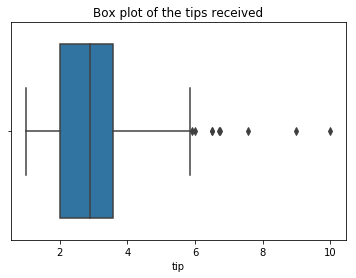

In [4]:
# Box plot shows the outliers clearly, hence, plotting it
sns.boxplot(tips_data['tip']).set_title('Box plot of the tips received')
plt.show()

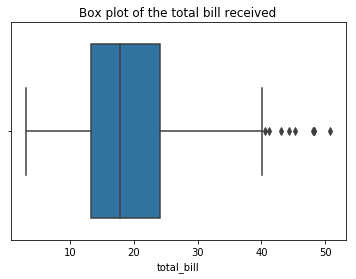

In [5]:
sns.boxplot(tips_data['total_bill']).set_title('Box plot of the total bill received')
plt.show()

In [27]:
# Function to detect outliers by the Inter Quartile Range method
def detect_outliers(data, lb, ub):
    outliers = []
    for i in data:
        if i<=lb or i>=ub:
            outliers.append(i)
    return outliers

In [28]:
# Getting the 25% and 75% values for the inter quartile range of the 'tip' column
Q1, Q3 = np.percentile(tips_data['tip'], [25, 75])
print('Q1 = ', Q1)
print('Q3 = ', Q3)

# Calculating the Inter Quartile Range (middle 50% of the data)
IQR = Q3 - Q1
print('IQR = ', IQR)

# Getting the lower and upper bounds to get outliers beyond these values
lb = Q1 - (1.5*IQR)
ub = Q3 + (1.5*IQR)
print('Lower bound = ', lb)
print('Upper bound = ', ub)

# Applying the function to 'tip' column
outliers = detect_outliers(tips_data['tip'], lb, ub)
y = set(outliers)
print('Outliers of the tip column are: ',y)
print('Number of outliers of the tip column are: ',len(y))

Q1 =  2.0
Q3 =  3.5624999999999996
IQR =  1.5624999999999996
Lower bound =  -0.3437499999999991
Upper bound =  5.906249999999998
Outliers of the tip column are:  {5.92, 6.7, 6.73, 6.5, 6.0, 10.0, 7.58, 9.0}
Number of outliers of the tip column are:  8


In [29]:
# Getting the 25% and 75% values for the inter quartile range of the 'total_bill' column
Q1, Q3 = np.percentile(tips_data['total_bill'], [25, 75])
print('Q1 = ', Q1)
print('Q3 = ', Q3)

# Calculating the Inter Quartile Range (middle 50% of the data)
IQR = Q3 - Q1
print('IQR = ', IQR)

# Getting the lower and upper bounds to get outliers beyond these values
lb = Q1 - (1.5*IQR)
ub = Q3 + (1.5*IQR)
print('Lower bound = ', lb)
print('Upper bound = ', ub)

# Applying the function to 'total_bill' column
outliers = detect_outliers(tips_data['total_bill'], lb, ub)
y = set(outliers)
print('Outliers of the total_bill column are: ', y)
print('Number of outliers of the total_bill column are: ', len(y))

Q1 =  13.3475
Q3 =  24.127499999999998
IQR =  10.779999999999998
Lower bound =  -2.8224999999999945
Upper bound =  40.29749999999999
Outliers of the total_bill column are:  {40.55, 41.19, 43.11, 44.3, 45.35, 48.27, 48.17, 50.81, 48.33}
Number of outliers of the total_bill column are:  9


In [30]:
# Function to detect outliers by the z - factor method
def calculate_outliers(data, threshold):
    outliers = []
    std = np.std(data)
    mean = np.mean(data)
    print(std, mean)
    for num in data:
        z = (num-mean) / std # calculating the z factor
        
        if z > threshold: # 
            outliers.append(num)
            
    return set(outliers)

In [34]:
# Applying the function to 'tip' column
tip_outliers = calculate_outliers(tips_data['tip'], 2.1) # 3 is generally taken as threshold, can alter it as needed
print('Outliers of tip column = ', tip_outliers)
print('Number of outliers of tip column = ', len(tip_outliers))

1.3807999538298954 2.99827868852459
Outliers of tip column =  {5.92, 6.7, 6.73, 6.5, 6.0, 10.0, 7.58, 9.0}
Number of outliers of tip column =  8


In [36]:
# Applying the function to 'total_bill' column
total_bill_outliers = calculate_outliers(tips_data['total_bill'], 2.3)
print('Outliers of tip column = ', tip_outliers)
print('Number of outliers of total_bill column = ', len(total_bill_outliers))

8.884150577771132 19.78594262295082
Outliers of tip column =  {5.92, 6.7, 6.73, 6.5, 6.0, 10.0, 7.58, 9.0}
Number of outliers of total_bill column =  9


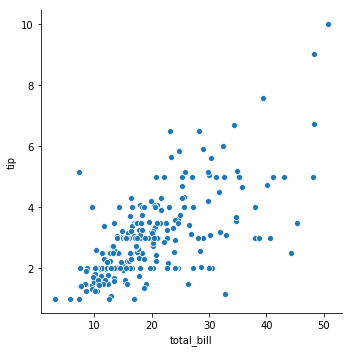

In [38]:
# Making a scatter plot to detect outliers from this graph
sns.relplot(x='total_bill', y='tip', data=tips_data)
plt.show()